<a href="https://colab.research.google.com/github/sharunraj14/ICT_Projects/blob/main/Loan_Eligibility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

Loading and Preview Data

In [2]:

train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

print("Train Data Preview")
display(train.head())

print("Test Data Preview")
display(test.head())

print("Train shape:", train.shape)
print("Test shape:", test.shape)

print("\nColumns:")
print(train.columns)

Train Data Preview


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Test Data Preview


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Train shape: (614, 13)
Test shape: (367, 12)

Columns:
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


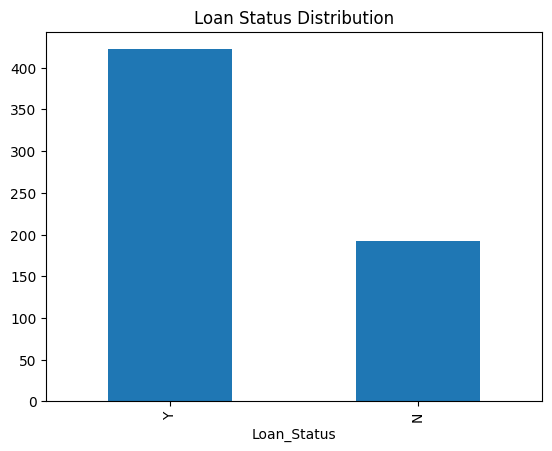

In [3]:
train['Loan_Status'].value_counts().plot(kind='bar')
plt.title("Loan Status Distribution")
plt.show()

Check missing values

In [4]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [5]:
pd.crosstab(train['Credit_History'], train['Loan_Status'])

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


Handling missing values

In [6]:
for df in [train, test]:
    df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
    df['Married'].fillna(df['Married'].mode()[0], inplace=True)
    df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
    df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
    df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

    df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
    df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

/tmp/ipython-input-70209647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-70209647.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

Feature Engineering

In [7]:
for df in [train, test]:
    df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
    df['TotalIncome_log'] = np.log(df['TotalIncome'])
    df['LoanAmount_log'] = np.log(df['LoanAmount'])

Separate target (prevent leak)

In [8]:
y = train['Loan_Status'].map({'N': 0, 'Y': 1})

train = train.drop(['Loan_Status', 'Loan_ID'], axis=1)
test = test.drop('Loan_ID', axis=1)

Encode categorical variables

In [9]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

train, test = train.align(test, join='left', axis=1, fill_value=0)

Train-validation split

In [10]:
X_train, X_val, y_train, y_val = train_test_split(
    train, y, test_size=0.2, random_state=42
)

Model Train

In [11]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

Accuracy

In [12]:
pred_val = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, pred_val))

Validation Accuracy: 0.7886178861788617


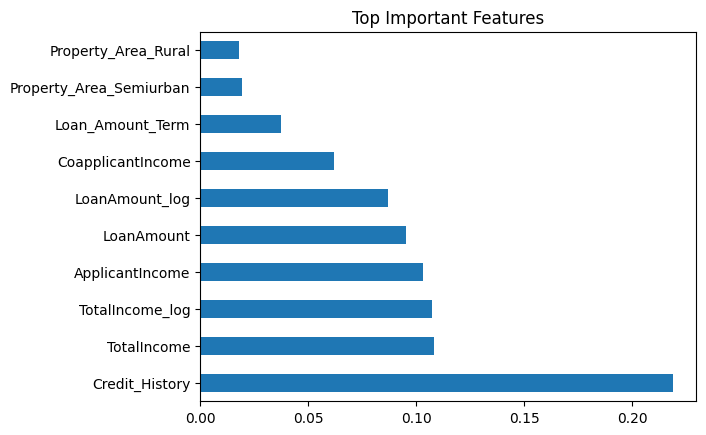

In [13]:
importance = pd.Series(model.feature_importances_, index=X_train.columns)
importance.nlargest(10).plot(kind='barh')
plt.title("Top Important Features")
plt.show()

Train on full dataset

In [14]:
model.fit(train, y)

RandomForestClassifier(n_estimators=200, random_state=42)

Predict test dataset

In [15]:
test_pred = model.predict(test)

In [16]:
pd.Series(test_pred).value_counts()

,count
1,292
0,75


Creating submission file

In [17]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

submission['Loan_Status'] = ['Y' if i == 1 else 'N' for i in test_pred]

submission.to_csv('submission.csv', index=False)

submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


Download submission file

In [19]:
from google.colab import files

files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>